In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
from datetime import date
import function as fun

# # Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (30, 60)
lng_range = (-70, -120)

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=30.000, high=60.000, size=1500)
lngs = np.random.uniform(low=-70.000, high=-120.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

653

In [4]:
# build URL to make API call based on weather data from 1/1/2008 - 12/1/2010
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&type=hour&start={1199145600}&end={1293753600}&q="

# Create the Lists to be used in the Dictionary for the Data Frame
name = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
min_temp = []
wind_speed = []
counter = 0

# Loop through the entire list of cities and request data for each city
for city in cities:
    try:
        city_response = requests.get(query_url + city).json()
        name.append(city_response['name'])
        country.append(city_response['sys']['country'])
        date.append(city_response['dt'])
        humidity.append(city_response['main']['humidity'])
        lat.append(city_response['coord']['lat'])
        lng.append(city_response['coord']['lon'])
        max_temp.append(city_response['main']['temp_max'])
        min_temp.append(city_response['main']['temp_min'])
        wind_speed.append(city_response['wind']['speed'])
        counter += 1
        print(f"Processing Request {counter} | {city}")
        time.sleep(2)
    except Exception:
        print(f"City not found -- Skipping: {city}")

Processing Request 1 | atlantic city
Processing Request 2 | grants
Processing Request 3 | clifton
Processing Request 4 | evanston
Processing Request 5 | myrtle beach
Processing Request 6 | nipawin
Processing Request 7 | natchitoches
Processing Request 8 | gimli
Processing Request 9 | sioux lookout
Processing Request 10 | puerto penasco
Processing Request 11 | berwick
Processing Request 12 | virginia beach
Processing Request 13 | flin flon
Processing Request 14 | tooele
Processing Request 15 | lake havasu city
Processing Request 16 | laurel
Processing Request 17 | mitchell
Processing Request 18 | sault sainte marie
Processing Request 19 | atchison
Processing Request 20 | east brainerd
Processing Request 21 | winslow
Processing Request 22 | matagami
City not found -- Skipping: attawapiskat
Processing Request 23 | moose factory
Processing Request 24 | devils lake
Processing Request 25 | flagstaff
Processing Request 26 | lawrenceburg
Processing Request 27 | gardner
Processing Request 28 | 

Processing Request 232 | grimshaw
Processing Request 233 | indianola
Processing Request 234 | pinawa
Processing Request 235 | camp verde
Processing Request 236 | two hills
City not found -- Skipping: longlac
Processing Request 237 | texarkana
Processing Request 238 | san clemente
Processing Request 239 | bassano
Processing Request 240 | hattiesburg
Processing Request 241 | morris
Processing Request 242 | progreso
Processing Request 243 | crestview
Processing Request 244 | elliot lake
Processing Request 245 | dumas
Processing Request 246 | bismarck
Processing Request 247 | winnemucca
Processing Request 248 | pierre
Processing Request 249 | neosho
Processing Request 250 | san angelo
Processing Request 251 | rancho palos verdes
Processing Request 252 | sumter
Processing Request 253 | tucumcari
Processing Request 254 | batesville
Processing Request 255 | dalton
Processing Request 256 | canyon
Processing Request 257 | saint-michel-des-saints
Processing Request 258 | lamar
Processing Request

Processing Request 462 | lovington
Processing Request 463 | lexington park
Processing Request 464 | sarnia
Processing Request 465 | lloydminster
Processing Request 466 | chippewa falls
Processing Request 467 | raymond
Processing Request 468 | neepawa
Processing Request 469 | corinth
Processing Request 470 | kearney
Processing Request 471 | platteville
Processing Request 472 | indian head
Processing Request 473 | plattsburgh
Processing Request 474 | kingman
Processing Request 475 | scottsboro
Processing Request 476 | sunrise manor
Processing Request 477 | pittsburg
Processing Request 478 | pincher creek
Processing Request 479 | fernie
Processing Request 480 | hackettstown
Processing Request 481 | moorhead
Processing Request 482 | dekalb
Processing Request 483 | excelsior springs
Processing Request 484 | boulder city
Processing Request 485 | bagotville
Processing Request 486 | cullman
Processing Request 487 | ville-marie
Processing Request 488 | kirkland lake
Processing Request 489 | whe

In [16]:
NA_list = pd.DataFrame(
    {'City': name,
     'Country': country,
     'Date': date,
     'Humidity': humidity,
     'Lat': lat,
     'Lng': lng,
     'Max Temp': max_temp,
     'Wind Speed': wind_speed})
     
NA_list.head()

,City,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Lacombe,CA,1584317403,60,52.47,-113.74,9.00,3.36
1,Creel,MX,1584317291,41,27.75,-107.63,60.71,11.43
2,Cabo San Lucas,MX,1584317408,60,22.89,-109.91,73.00,5.82
3,Eau Claire,US,1584317273,50,44.81,-91.50,39.20,3.36
4,Guaymas,MX,1584317413,50,27.93,-110.90,82.99,11.41


In [5]:
# load new df to csv
NA_list.to_csv(r'~/Desktop/RiceData/Homework/Projects/Data-Analysis-Project-1/Data/Kati_Data/output_data/Data_Maps/NA_list.csv', index = False)

NameError: name 'NA_list' is not defined

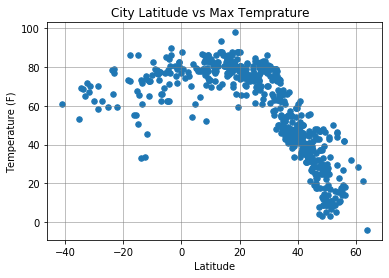

In [19]:
# create Lat vs. Max Temp correlation scatter plot
title = "City Latitude vs Max Temprature" + "  "
temp_plot = NA_list.plot.scatter(x='Lat',
                      y='Max Temp',s=30,title=title)
temp_plot.set_ylabel("Temperature (F)")
temp_plot.set_xlabel("Latitude")
temp_plot.grid(which='major', linestyle='-', linewidth='0.5', color='gray')

# output to png
plt.savefig('output_data/lat_temp.png')

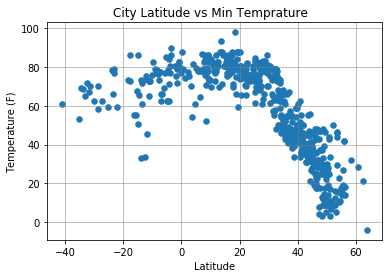

In [20]:
# create Lat vs. Min Temp correlation scatter plot
title = "City Latitude vs Min Temprature" + "  "
temp_plot = NA_list.plot.scatter(x='Lat',
                      y='Max Temp',s=30,title=title)
temp_plot.set_ylabel("Temperature (F)")
temp_plot.set_xlabel("Latitude")
temp_plot.grid(which='major', linestyle='-', linewidth='0.5', color='gray')

# output to png
plt.savefig('output_data/lat_temp.png')

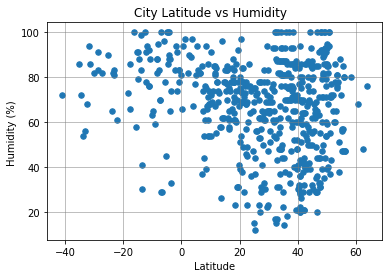

In [21]:
title = "City Latitude vs Humidity" + "  "
temp_plot = NA_list.plot.scatter(x='Lat',
                      y='Humidity',s=30,title=title)
temp_plot.set_ylabel("Humidity (%) ")
temp_plot.set_xlabel("Latitude")
temp_plot.grid(which='major', linestyle='-', linewidth='0.5', color='gray')

# output to png
plt.savefig('output_data/lat_humidity.png')

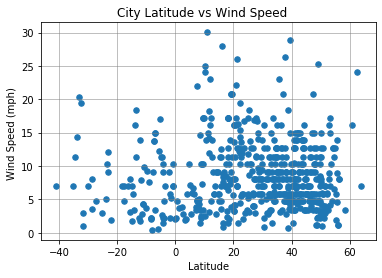

In [26]:
# create Lat vs. Wind Speed scatter plot
title = "City Latitude vs Wind Speed " + "  "
temp_plot = NA_list.plot.scatter(x='Lat',
                      y='Wind Speed',s=30,title=title)
temp_plot.set_ylabel("Wind Speed (mph) ")
temp_plot.set_xlabel("Latitude")
temp_plot.grid(which='major', linestyle='-', linewidth='0.5', color='gray')

# output to png
plt.savefig('output_data/lat_windspeed.png')

## Linear Regression

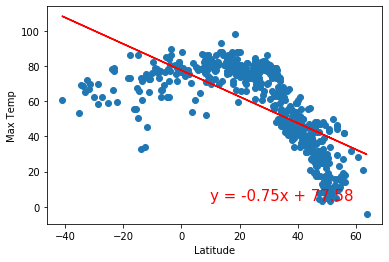

In [27]:
# create linear regressions for Northern Hemisphere - Max Temp vs. Latitude
x_values = NA_list['Lat']
y_values = NA_list['Max Temp']
fun.Lin_Reg(x_values,y_values,'Latitude','Max Temp')

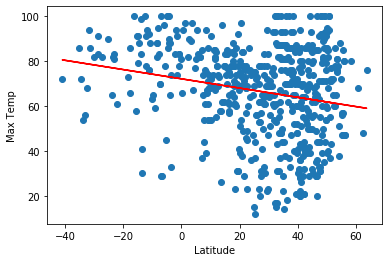

In [28]:
# create linear regressions for Humidity vs. Latitude
x_values = NA_list['Lat']
y_values = NA_list['Humidity']
fun.Lin_Reg(x_values,y_values,'Latitude','Max Temp')

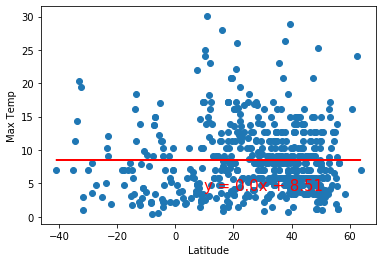

In [29]:
# create linear regressions for Wind Speed vs. Latitude
x_values = NA_list['Lat']
y_values = NA_list['Wind Speed']
fun.Lin_Reg(x_values,y_values,'Latitude','Max Temp')